# Tarea 1 | Análisis de Datos en Python | Magíster en Ciencias de Datos UC
### Luciano Davico

# Desarrollo

Primero importaremos los datos

In [114]:
import pandas as pd

df = pd.read_csv('data_football_ratings.csv', sep=',')

df.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,Kicker,1,3.50,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,SofaScore,0,6.70,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,...,0.051556,0.524845,0.041096,0.166667,0.0,1,0,1,13,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,Kicker,1,3.50,...,0.333284,0.710084,0.347826,0.675075,0.0,0,1,0,90,90


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50652 entries, 0 to 50651
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competition             50652 non-null  object 
 1   date                    50652 non-null  object 
 2   match                   50652 non-null  object 
 3   team                    50652 non-null  object 
 4   pos                     50652 non-null  object 
 5   pos_role                50652 non-null  object 
 6   player                  50652 non-null  object 
 7   rater                   50652 non-null  object 
 8   is_human                50652 non-null  int64  
 9   original_rating         50652 non-null  float64
 10  goals                   50652 non-null  int64  
 11  assists                 50652 non-null  int64  
 12  shots_ontarget          50652 non-null  int64  
 13  shots_offtarget         50652 non-null  int64  
 14  shotsblocked            50652 non-null

In [116]:
df.columns.values

array(['competition', 'date', 'match', 'team', 'pos', 'pos_role',
       'player', 'rater', 'is_human', 'original_rating', 'goals',
       'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked',
       'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses',
       'touches', 'passes_acc', 'passes_inacc', 'crosses_acc',
       'crosses_inacc', 'lballs_acc', 'lballs_inacc', 'grduels_w',
       'grduels_l', 'aerials_w', 'aerials_l', 'poss_lost', 'fouls',
       'wasfouled', 'clearances', 'stop_shots', 'interceptions',
       'tackles', 'dribbled_past', 'tballs_acc', 'tballs_inacc', 'ycards',
       'rcards', 'dangmistakes', 'countattack', 'offsides',
       'goals_ag_otb', 'goals_ag_itb', 'saves_itb', 'saves_otb',
       'saved_pen', 'missed_penalties', 'owngoals', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality',
       'flow_centrality', 'flow_success', 'betweenness2goals', 'win',
       'lost', 'is_home_team', 'minutesPlayed', 'game_duration'

## Pregunta 1
¿Cuál es el promedio, mediana y desviación estándar de los datos registrados en la columna
“original_rating”? 

## Respuesta

In [117]:
# Promedio
mean_1 = df['original_rating'].mean()
print(f'Promedio: {mean_1}')

median_1 = df['original_rating'].median()
print(f'Mediana: {median_1}')

dev_std_1 = df['original_rating'].std()
print(f'Desviación Estándar: {dev_std_1}')

Promedio: 5.687847271578614
Mediana: 6.04
Desviación Estándar: 1.6733562855959938


## Pregunta 2
¿Cuántos de los partidos de la base de datos tuvieron una duración (“game_duration”) de
120 minutos? 

## Respuesta

In [127]:
# Filtramos los que duraron 120 minutos y agrupamos la data por partidos
df2 = df[df['game_duration'] == 120].groupby(['match', 'competition', 'date']).count()
df2

,,,team,pos,pos_role,player,rater,is_human,original_rating,goals,assists,shots_ontarget,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
match,competition,date,,,,,,,,,,,,,,,,,,,,,
"Colombia - England, 1 - 1",World Cup 2018,03/07/2018,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
"Croatia - Denmark, 1 - 1",World Cup 2018,01/07/2018,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
"Croatia - England, 2 - 1",World Cup 2018,11/07/2018,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
"Croatia - Portugal, 0 - 1",Euro 2016,25/06/2016,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
"Germany - Italy, 1 - 1",Euro 2016,02/07/2016,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
"Poland - Portugal, 1 - 1",Euro 2016,30/06/2016,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
"Spain - Russia, 1 - 1",World Cup 2018,01/07/2018,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
"Switzerland - Poland, 1 - 1",Euro 2016,25/06/2016,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101


In [128]:
total_matches_2 = len(df2.index)

print(f'Total de partidos que duraron 120 minutos: {total_matches_2}')

Total de partidos que duraron 120 minutos: 8


## Pregunta 3
Considerando solamente los partidos de la Copa del Mundo 2018 (“World Cup 2018”),
¿cuántos partidos disputó Croacia? 

## Respuesta

In [125]:
df3 = df[(df['competition'] == 'World Cup 2018') & (df['team'] == 'Croatia')].groupby(['match', 'competition', 'date']).count()
df3

,,,team,pos,pos_role,player,rater,is_human,original_rating,goals,assists,shots_ontarget,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
match,competition,date,,,,,,,,,,,,,,,,,,,,,
"Argentina - Croatia, 0 - 3",World Cup 2018,21/06/2018,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
"Croatia - Denmark, 1 - 1",World Cup 2018,01/07/2018,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
"Croatia - England, 2 - 1",World Cup 2018,11/07/2018,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
"Croatia - Nigeria, 2 - 0",World Cup 2018,16/06/2018,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
"France - Croatia, 4 - 2",World Cup 2018,15/07/2018,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
"Iceland - Croatia, 1 - 2",World Cup 2018,26/06/2018,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [126]:
total_matches_3 = len(df3.index)

print(f'Total de partidos disputados por Croacia en el mundial de 2018: {total_matches_3}')

Total de partidos disputados por Croacia en el mundial de 2018: 6


Cabe destacar que el partido **Croacia - Rusia** no se encuentra en la base de datos, así que en estricto rigor Croacia jugó 7 partidos en el mundial 2018.

## Pregunta 4
Construya un gráfico de torta con los goles marcados por Robert Lewandowski, agrupando
los goles que marcó por su selección y por su club. 

## Respuesta

In [129]:
# Filtramos por lewandowski y nos quedamos solo con un dato de rating por partido (solo nos importan los goles hechos por el)
df4_lewandowski = df[(df['player'] == 'Robert Lewandowski')][['competition', 'date', 'match', 'team', 'player', 'goals']].drop_duplicates()
df4_lewandowski

,competition,date,match,team,player,goals
372,Euro 2016,12/06/2016,"Poland - Northern Ireland, 1 - 0",Poland,Robert Lewandowski,0
1382,Euro 2016,16/06/2016,"Germany - Poland, 0 - 0",Poland,Robert Lewandowski,0
2469,Euro 2016,21/06/2016,"Ukraine - Poland, 0 - 1",Poland,Robert Lewandowski,0
2985,Euro 2016,25/06/2016,"Switzerland - Poland, 1 - 1",Poland,Robert Lewandowski,0
3682,Euro 2016,30/06/2016,"Poland - Portugal, 1 - 1",Poland,Robert Lewandowski,1
4734,Bundesliga 2017-18,18/08/2017,"Bayern Munich - Bayer Leverkusen, 3 - 1",Bayern Munich,Robert Lewandowski,1
6058,Bundesliga 2017-18,26/08/2017,"Werder Bremen - Bayern Munich, 0 - 2",Bayern Munich,Robert Lewandowski,2
7365,Bundesliga 2017-18,09/09/2017,"Hoffenheim - Bayern Munich, 2 - 0",Bayern Munich,Robert Lewandowski,0
8577,Bundesliga 2017-18,16/09/2017,"Bayern Munich - Mainz 05, 4 - 0",Bayern Munich,Robert Lewandowski,2
9355,Bundesliga 2017-18,19/09/2017,"Schalke 04 - Bayern Munich, 0 - 3",Bayern Munich,Robert Lewandowski,1


In [130]:
# Vemos que solo jugo en un equipo y en su seleccion
national_team, team = df4_lewandowski['team'].unique() # ['Poland' 'Bayern Munich']

# Agrupamos los goles por equipo
df4 = df4_lewandowski[['team', 'goals']].groupby('team').sum()
df4

,goals
team,
Bayern Munich,25
Poland,1


<Axes: ylabel='goals'>

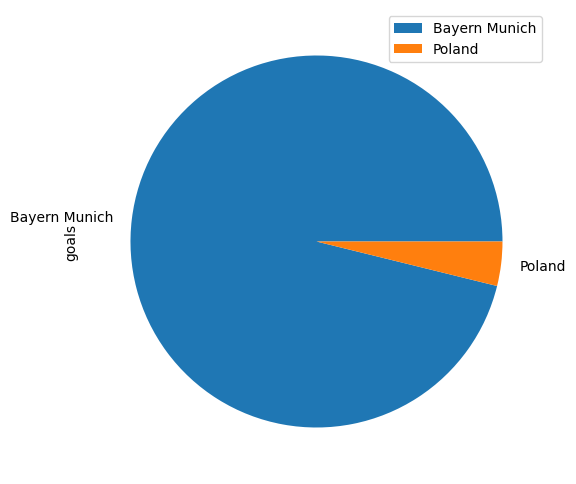

In [131]:
df4.plot(kind='pie', y='goals', figsize=(6,10))

## Pregunta 5
¿Cuántas tarjetas rojas fueron mostradas en la Eurocopa 2016 (“Euro 2016”)? 

## Respuesta

In [123]:
df5 = df[df['competition'] == 'Euro 2016'][['date', 'match', 'team', 'goals', 'rcards', 'player']].drop_duplicates()
df5_grouped = df5[['date', 'match', 'rcards']].groupby(['date', 'match']).sum()
df5_grouped

rcards
date       match                                    
01/07/2016 Wales - Belgium, 3 - 1                  0
02/07/2016 Germany - Italy, 1 - 1                  0
03/07/2016 France - Iceland, 5 - 2                 0
06/07/2016 Portugal - Wales, 2 - 0                 0
07/07/2016 Germany - France, 0 - 2                 0
10/06/2016 France - Romania, 2 - 1                 0
11/06/2016 Albania - Switzerland, 0 - 1            0
           England - Russia, 1 - 1                 0
           Wales - Slovakia, 2 - 1                 0
12/06/2016 Germany - Ukraine, 2 - 0                0
           Poland - Northern Ireland, 1 - 0        0
           Turkey - Croatia, 0 - 1                 0
13/06/2016 Belgium - Italy, 0 - 2                  0
           Ireland - Sweden, 1 - 1                 0
           Spain - Czech Republic, 1 - 0           0
14/06/2016 Austria - Hungary, 0 - 2                0
           Portugal - Iceland, 1 - 1               0
15/06/2016 France - Albania, 2 - 0                 0
           Romania - Switzerland, 1 - 1            0
           Russia - Slovakia, 1 - 2                0
16/06/2016 Germany - Poland, 0 - 0                 0
           Ukraine - Northern Ireland, 0 - 2       0
17/06/2016 Czech Republic - Croatia, 2 - 2         0
           Italy - Sweden, 1 - 0                   0
           Spain - Turkey, 3 - 0                   0
18/06/2016 Belgium - Ireland, 3 - 0                0
           Iceland - Hungary, 1 - 1                0
           Portugal - Austria, 0 - 0               0
19/06/2016 Romania - Albania, 0 - 1                0
           Switzerland - France, 0 - 0             0
20/06/2016 Russia - Wales, 0 - 3                   0
           Slovakia - England, 0 - 0               0
21/06/2016 Croatia - Spain, 2 - 1                  0
           Czech Republic - Turkey, 0 - 2          0
           Northern Ireland - Germany, 0 - 1       0
           Ukraine - Poland, 0 - 1                 0
22/06/2016 Hungary - Portugal, 3 - 3               0
           Iceland - Austria, 2 - 1                0
           Italy - Ireland, 0 - 1                  0
           Sweden - Belgium, 0 - 1                 0
25/06/2016 Croatia - Portugal, 0 - 1               0
           Switzerland - Poland, 1 - 1             0
           Wales - Northern Ireland, 1 - 0         0
26/06/2016 France - Ireland, 2 - 1                 1
           Germany - Slovakia, 3 - 0               0
           Hungary - Belgium, 0 - 4                0
27/06/2016 England - Iceland, 1 - 2                0
           Italy - Spain, 2 - 0                    0
30/06/2016 Poland - Portugal, 1 - 1                0

In [124]:
red_cards_5 = df5_grouped['rcards'].sum()

print(f'Hubo {red_cards_5} tarjeta(s) roja(s) en la Eurocopa 2016')

Hubo 1 tarjeta(s) roja(s) en la Eurocopa 2016


## Pregunta 6
Construya un Dataframe que contenga, para cada jugador del archivo, la cantidad total de
partidos en los que fue evaluado. Muestre solamente los 10 primeros registros de este
Dataframe. Considere que un jugador no es evaluado cuando original_rating = 1 y los
minutos jugados por el jugador es menor que 20 (minutos).

## Respuesta

In [100]:
df6 = df[(df.original_rating != 1) & (df.minutesPlayed >= 20)][['competition', 'date', 'match', 'player']].drop_duplicates()
grouped_df6 = df6[['player', 'match']].groupby(['player']).count()
grouped_df6 = grouped_df6.rename({'match': 'total_matches_evaluated'}, axis=1)


In [105]:
grouped_df6.head(10)

,total_matches_evaluated
player,
Aaron Cresswell,34
Aaron Hughes,3
Aaron Hunt,28
Aaron Lennon,27
Aaron Mooy,39
Aaron Ramsey,26
Aaron Wan-Bissaka,7
Abdallah El Said,3
Abdelhamid Sabiri,4
